<a href="https://colab.research.google.com/github/sbooeshaghi/colosseum/blob/master/analysis/archimedian_spiral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/sbooeshaghi/colosseum.git

Cloning into 'colosseum'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 583 (delta 25), reused 36 (delta 12), pack-reused 524
Receiving objects: 100% (583/583), 11.94 MiB | 23.32 MiB/s, done.
Resolving deltas: 100% (306/306), done.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import matplotlib.patches as mpatches
import math
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mtick
import matplotlib.patches as patches

plt.rcParams.update({'font.size': 20})
%config InlineBackend.figure_format = 'retina'

In [3]:
# Function source: https://stackoverflow.com/a/27528612/13731947

def spiral_points(init_d = 18.595, arc=1, separation=1):
    """generate points on an Archimedes' spiral
    with `arc` giving the length of arc between two points
    and `separation` giving the distance between consecutive 
    turnings
    - approximate arc length with circle arc at given distance
    - use a spiral equation r = b * phi
    """
    def p2c(r, phi):
        """polar to cartesian
        """
        return (r * math.cos(phi), r * math.sin(phi), phi)

    # yield a point at origin
    yield (0, 0, 0)

    # initialize the next point in the required distance
    r = init_d
    b = separation / (2 * math.pi)
    # find the first phi to satisfy distance of `arc` to the second point
    phi = float(r) / b
    while True:
        yield p2c(r, phi)
        # advance the variables
        # calculate phi that will give desired arc length at current radius
        # (approximating with circle)
        phi += float(arc) / r
        r = b * phi

In [4]:
# number of tubes
n_tubes = 88

# distances between tubes along arc
arc = 13.0

# distance between succesive windings of the spiral
separation = 19.5

# initial distance from the center of the tube bed
init_d = 18.595

## Generate spiral

In [5]:
data = np.zeros((n_tubes,2))
phi = np.zeros(n_tubes)
for idx, (x,y,p) in enumerate(spiral_points(init_d = init_d, arc=arc, separation=separation)):
    if idx==n_tubes:
        break
    data[idx] = [x,y]
    phi[idx] = p

In [6]:
# radius of the tube bed
r = 100

# radius of effective area for tubes to be placed
r_eff = r-10

# radius of the set screw for the center shaft
r_empty = 23/2.

# radius of the tube hole
r_tube = 11/2.

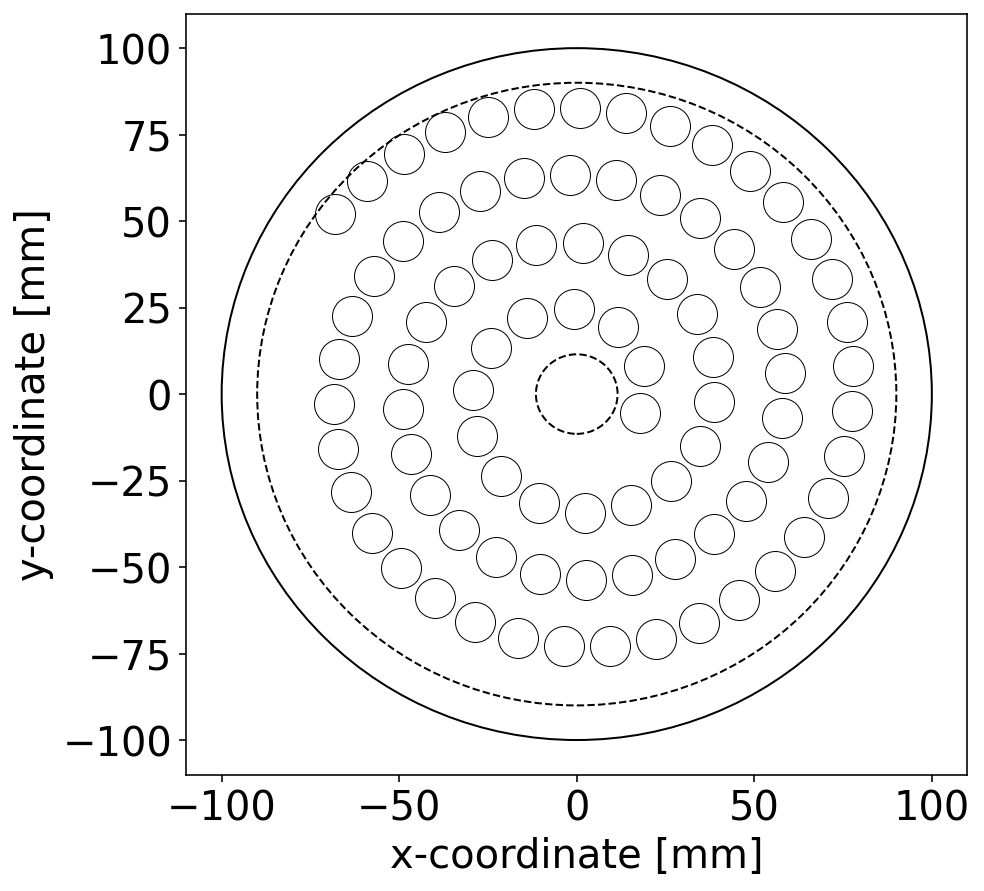

In [7]:
fig, ax = plt.subplots(figsize=(7, 7))

x = data[:,0][1:]
y = data[:,1][1:]

# plot tubes
ax.plot(x, y, 'o', ms=20, markerfacecolor="None",markeredgecolor='black', markeredgewidth=0.5)

# plot colosseum features
circles = [(r, '-'), (r_eff,"--"), (r_empty, "--")]
for radius, lstyle in circles:
  ax.add_patch(patches.Circle((0, 0), radius, facecolor='none', edgecolor='k', linewidth=1, linestyle=lstyle))

ax.set(**{
    "xlabel":"x-coordinate [mm]", 
    "ylabel":"y-coordinate [mm]"
    })

# fig.savefig("spiral.png", dpi=300, bbox_inches ='tight')

fig.show()

In [14]:
rad = []
for n, (x, y) in enumerate(data):
    t = math.atan2(y,x)+ n*2*np.pi
    rad.append(t)

def rad2deg(rad):
  return np.array(rad)*180/np.pi

def deg2step(deg):
  return np.array(deg)*200/360 

theta_rad = np.array(rad)
theta_deg = rad2deg(rad)
theta_stp = deg2step(theta_deg)

In [15]:
diff = phi[1:]-phi[:-1]
diff_deg = rad2deg(diff)
diff_stp = deg2step(diff_deg)

total_deg = rad2deg(phi)
total_stp = deg2step(total_deg)

## $\Delta \Theta$ between tubes

In [16]:
measured =  np.array([84, 78, 75, 70, 64, 61, 58, 56, 54, 52, 50, 48, 47, 46, 45, 44, 43,
                      42, 41, 40, 39, 39, 38, 37, 36, 36, 35, 34, 34, 34, 33, 33, 32, 32,
                      31, 31, 31, 30, 30, 30, 29, 29, 29, 28, 28, 28, 27, 27, 27, 26, 26,
                      26, 26, 26, 25, 25, 25, 25, 24, 24, 24, 24, 24, 24, 23, 23, 23, 23,
                      23, 23, 22, 22, 22, 22, 22, 22, 22, 22, 21, 21, 21, 21, 21, 21, 21,
                      20, 20])
measured = measured/4 # since these are quarter steps

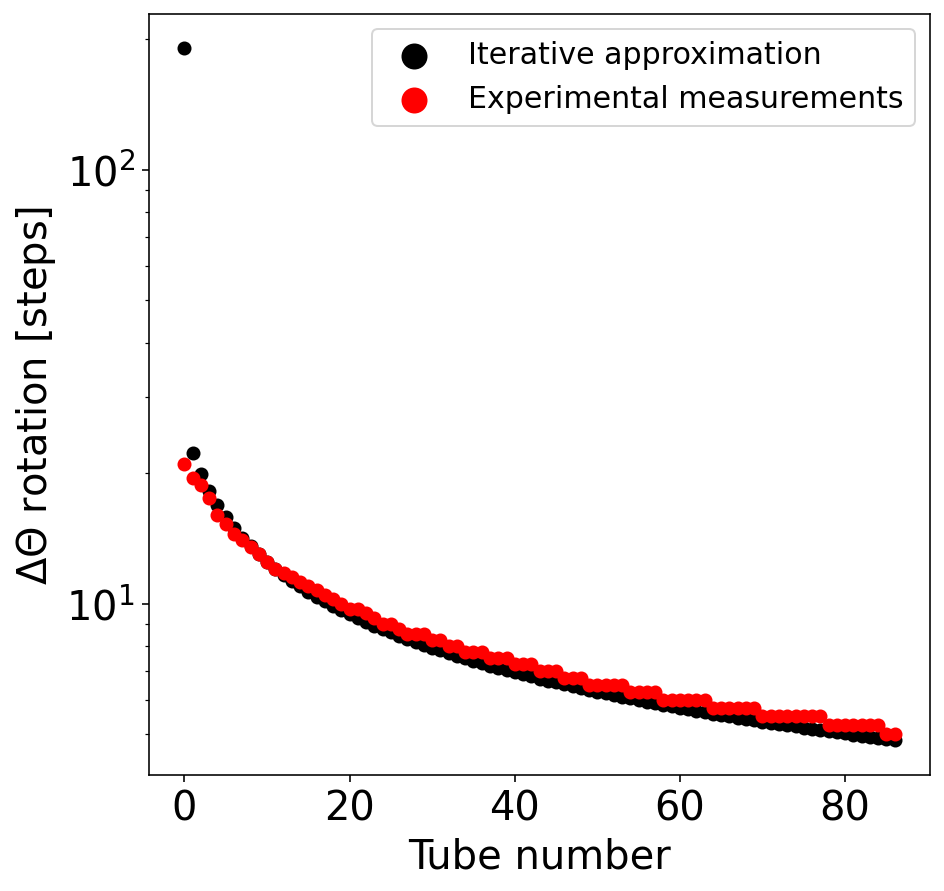

In [17]:
fig, ax = plt.subplots(figsize=(7,7))

x = np.arange(len(diff_stp))
y = diff_stp

ax.scatter(x, y, color="black", zorder=10, label='Iterative approximation')
ax.scatter(x, measured, color='r', zorder=10, label="Experimental measurements")

ax.set(**{
    "xlabel": "Tube number",
    "ylabel":"$\Delta \Theta$ rotation [steps]",
    'yscale': 'log'
    })

ax.legend(fontsize=15,markerscale=2)

fig.savefig("delta_theta.png", dpi=300, bbox_inches ='tight')

fig.show()

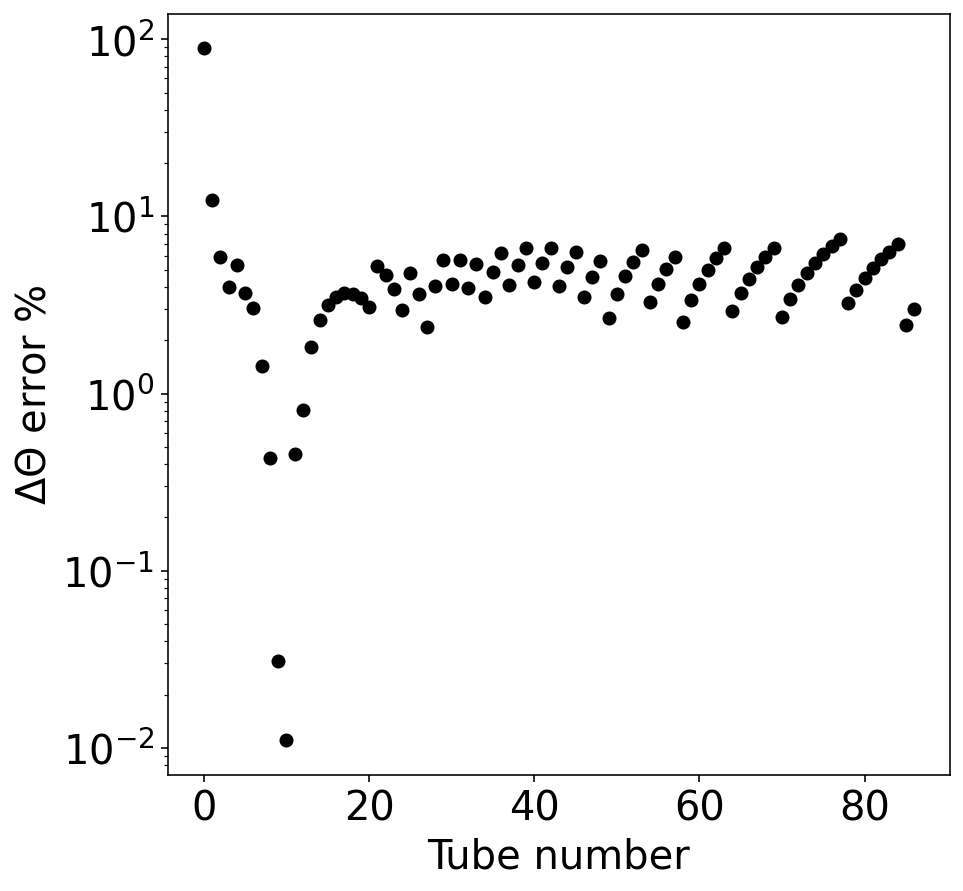

In [18]:
fig, ax = plt.subplots(figsize=(7,7))

x = np.arange(len(diff_stp))
error = np.abs(diff_stp-measured)/diff_stp*100

ax.scatter(x, error, color='black')

ax.set(**{
    "yscale": 'log',
    'ylabel': "$\Delta \Theta$ error %",
    'xlabel': 'Tube number'
    })

fig.savefig("delta_theta_error.png", dpi=300, bbox_inches ='tight')

fig.show()

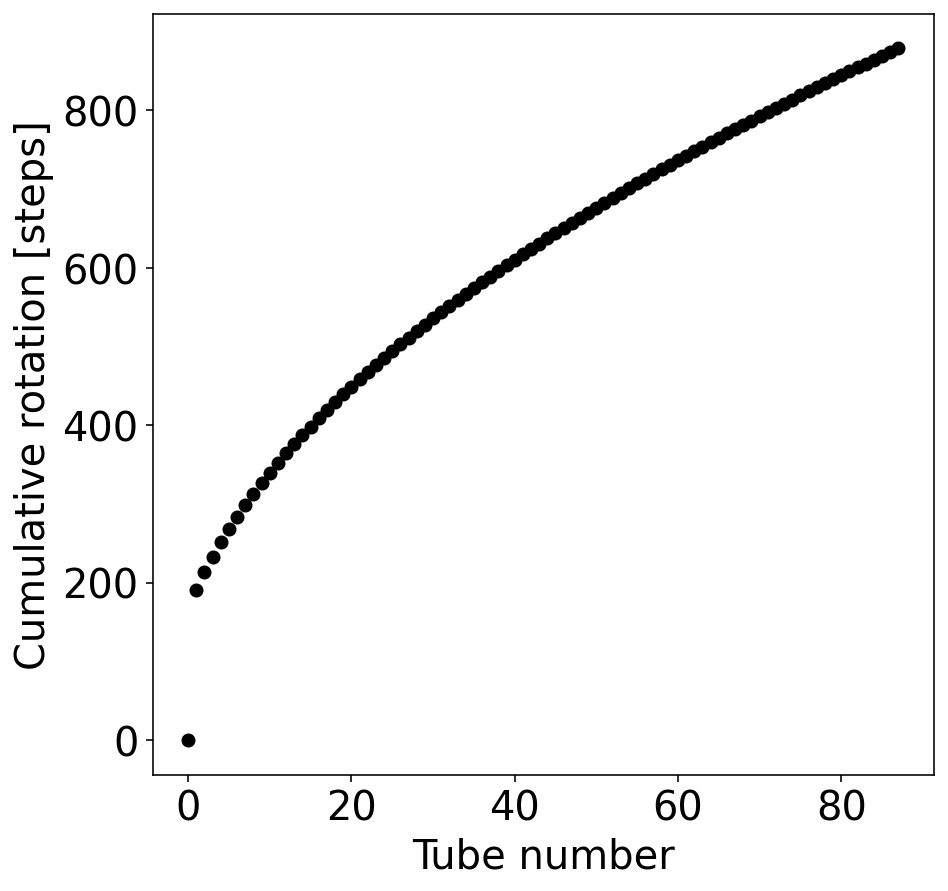

In [19]:
fig, ax = plt.subplots(figsize=(7,7))

x = np.arange(len(theta_stp))
y = total_stp

ax.scatter(x, y, color="black", zorder=-10)

ax.set(**{
    "xlabel": "Tube number",
    "ylabel":"Cumulative rotation [steps]",
    })

fig.savefig("cumulative_theta.png", dpi=300, bbox_inches ='tight')

fig.show()

In [20]:
# Diamater of the tube bed = 200 mm
# Diameter of the individual tube holder = 11 mm + 2.5 mm buffer = 13.5

# calculator for minimal waste: http://hydra.nat.uni-magdeburg.de/packing/cci/cci.html#Applications
# !wget -O optimal.txt http://hydra.nat.uni-magdeburg.de/packing/tmp/tmp2021_cci_01_27_04_58_03.txt
# flatten all spaces to one and remove all spaces from the beginning to the first word
# !cat optimal.txt |tr -s ' ' | sed -e 's/^[ \t]*//' > tmp && mv tmp optimal.txt

# file is in /content/colosseum/data/optimal.txt

# Diameter of large disk:   180
# Diameter of small circles:   13.5
# Output parameters
# Number of circles that will fit:   146
# Waste:   17.87%

In [21]:
pack = pd.read_csv('/content/colosseum/data/optimal.txt', sep=" ",header=None, names=['x', 'y'])

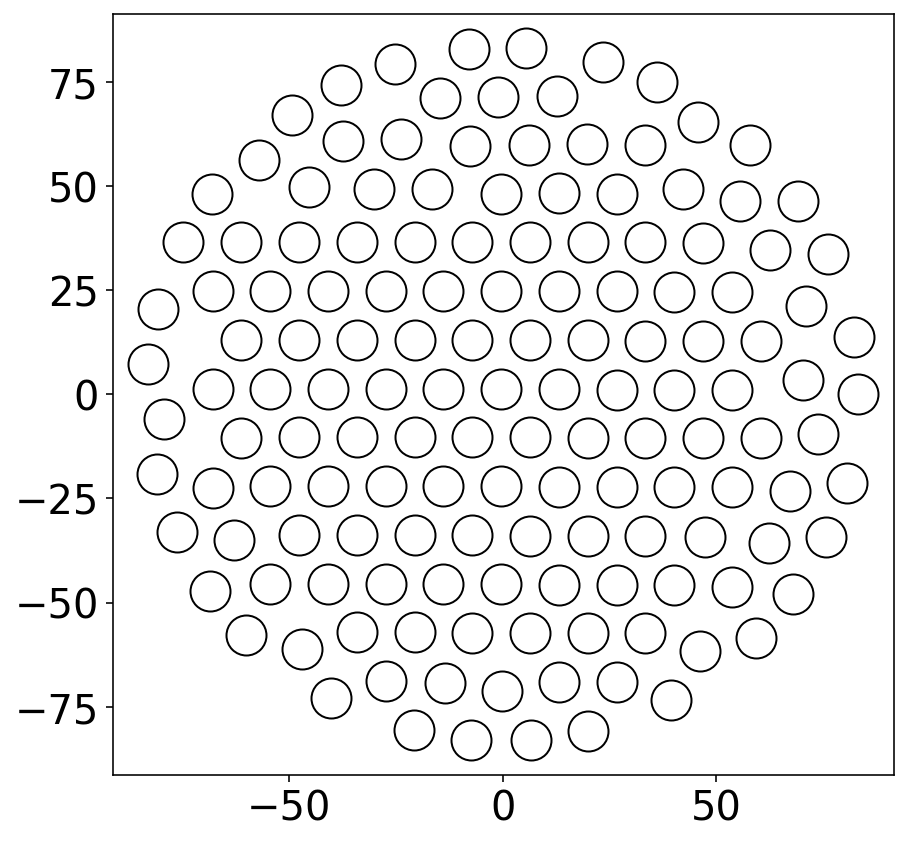

In [22]:
fig, ax = plt.subplots(figsize=(7,7))

x = pack['x']
y = pack['y']

ax.plot(x, y, 'o', ms=20, markerfacecolor="None",markeredgecolor='black', markeredgewidth=1)

fig.show()

In [23]:
88/146

0.6027397260273972